In [31]:
import matplotlib.pyplot as pt
import pandas as pd
import pymysql as p
import warnings
warnings.filterwarnings("ignore")
hr = p.connect(
    host="localhost",
    user="root",
    password="shiva002",
    database="hr"
)
sp6=hr.cursor()

In [2]:
#task1  country name region associated with them
sp6.execute("select c.country_name,region_name from countries as c inner join regions as r on c.region_id=r.region_id")
for i in sp6:
    print(i)

('Belgium', 'Europe')
('Switzerland', 'Europe')
('Germany', 'Europe')
('Denmark', 'Europe')
('France', 'Europe')
('Italy', 'Europe')
('Netherlands', 'Europe')
('United Kingdom', 'Europe')
('Argentina', 'Americas')
('Brazil', 'Americas')
('Canada', 'Americas')
('Mexico', 'Americas')
('United States of America', 'Americas')
('Australia', 'Asia')
('China', 'Asia')
('HongKong', 'Asia')
('India', 'Asia')
('Japan', 'Asia')
('Singapore', 'Asia')
('Egypt', 'Middle East and Africa')
('Israel', 'Middle East and Africa')
('Kuwait', 'Middle East and Africa')
('Nigeria', 'Middle East and Africa')
('Zambia', 'Middle East and Africa')
('Zimbabwe', 'Middle East and Africa')


In [28]:
#task 3 city wise and country wise no of employees and save it in csv-file and use chart
sp6.execute("""select c.country_name,count(e.employee_id) as No_of_Emp from employees as e 
inner join departments as d on e.department_id=d.department_id
inner join locations as l on d.location_id=l.location_id
inner join countries as c on l.country_id=c.country_id
group by c.country_name order by No_of_Emp""")

4

In [29]:
dat=sp6.fetchall()
for i in dat:
    print(i)

('Germany', 1)
('Canada', 2)
('United Kingdom', 35)
('United States of America', 68)


In [32]:
#saving to df from sql
country=pd.read_sql_query("""select c.country_name,count(e.employee_id) as No_of_Emp from employees as e 
inner join departments as d on e.department_id=d.department_id
inner join locations as l on d.location_id=l.location_id
inner join countries as c on l.country_id=c.country_id
group by c.country_name order by No_of_Emp""",hr)
country

,country_name,No_of_Emp
0,Germany,1
1,Canada,2
2,United Kingdom,35
3,United States of America,68


In [35]:
#saving to df from sql
city=pd.read_sql_query("""select l.city,count(e.employee_id) as No_of_Emp from employees as e
inner join departments as d on e.department_id=d.department_id
inner join locations as l on d.location_id=l.location_id
group by l.city order by No_of_Emp """,hr)
city

,city,No_of_Emp
0,London,1
1,Munich,1
2,Toronto,2
3,Southlake,5
4,Seattle,18
5,Oxford,34
6,South San Francisco,45


In [38]:
#saving to csv of country wise count of emp 
country.to_csv("country.csv",index=False)

In [37]:
#saving to csv of city wise
city.to_csv("city.csv",index=False)

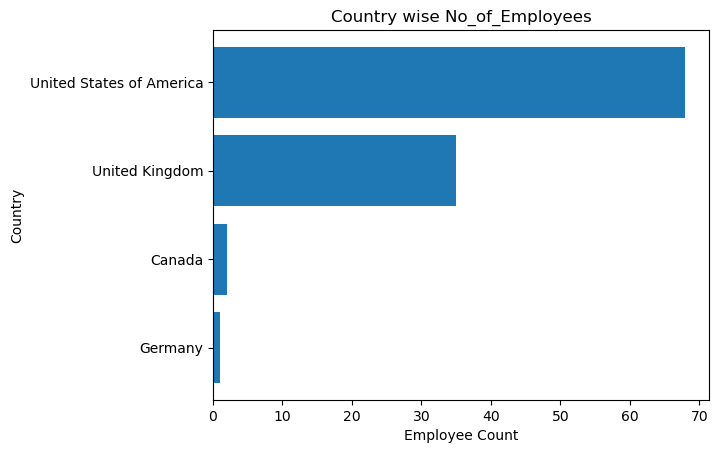

In [39]:
#graph using matplotlib
pt.barh(country['country_name'],country['No_of_Emp'])
pt.title("Country wise No_of_Employees")
pt.xlabel("Employee Count")
pt.ylabel("Country")
pt.show()

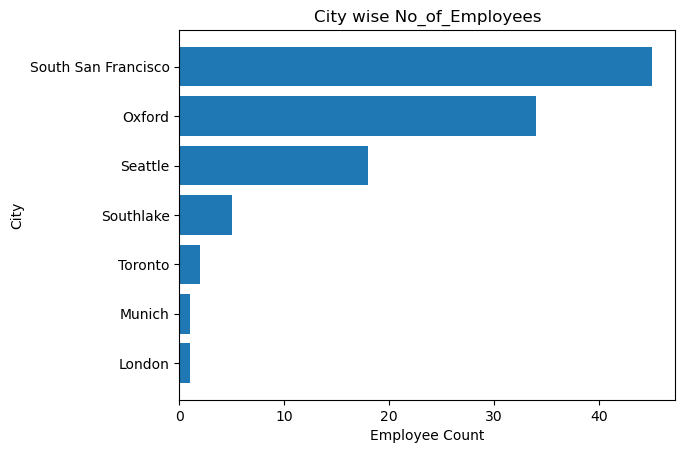

In [40]:
#grapg using matplotlib
pt.barh(city['city'],city['No_of_Emp'])
pt.title("City wise No_of_Employees")
pt.xlabel("Employee Count")
pt.ylabel("City")
pt.show()